In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Womens Clothing E-Commerce Reviews.csv").iloc[:,1:]
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
sentence = data['Review Text'][1]
print(sentence)

Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.


#### 1. Using Vader (NLTK)

In [4]:
import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(sentence)

{'neg': 0.0, 'neu': 0.664, 'pos': 0.336, 'compound': 0.9729}

#### 2. Using TextBlob

In [5]:
from textblob import TextBlob
TextBlob(sentence).sentiment

Sentiment(polarity=0.33958333333333335, subjectivity=0.7250000000000001)

#### 3. Using Flair

In [10]:
import flair
# flair_sentiment = flair.models.TextClassifier.load('en-sentiment')

In [9]:
s = flair.data.Sentence(sentence)
flair_sentiment.predict(s)
total_sentiment = s.labels
total_sentiment

[POSITIVE (0.9999)]

### Estimating score for each word

NLTK sentiment

Love : 0.6369
the : 0.0
color : 0.0
and : 0.0
style, : 0.0
but : 0.0
material : 0.0
snags : 0.0
easily : 0.34


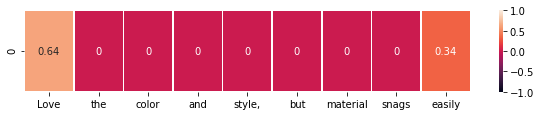

In [11]:
sample_review = data.loc[52,"Review Text"]

# NLTK
print("NLTK sentiment\n")
for word in sample_review.split():
    print("{} : {}".format(word, sid.polarity_scores(word)['compound']))
    
sentiment_score_nltk = [sid.polarity_scores(word)['compound'] for word in sample_review.split()]
plt.figure(figsize=(10,1.5))
sns.heatmap([sentiment_score_nltk], vmin=-1,vmax=1, xticklabels=sample_review.split(), annot=True, linewidths=.5)
plt.show()
# sentiment_score_nltk

TextBlob sentiment

Love : 0.5
the : 0.0
color : 0.0
and : 0.0
style, : 0.0
but : 0.0
material : 0.0
snags : 0.0
easily : 0.43333333333333335


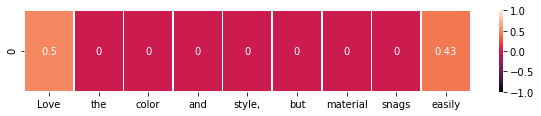

In [12]:
sample_review = data.loc[52,"Review Text"]

# Text Blob
print("TextBlob sentiment\n")
for word in sample_review.split():
    print("{} : {}".format(word, TextBlob(word).sentiment.polarity))
    
sentiment_score_tblob = [TextBlob(word).sentiment.polarity for word in sample_review.split()]

plt.figure(figsize=(10,1.5))
sns.heatmap([sentiment_score_tblob], vmin=-1,vmax=1, xticklabels=sample_review.split(), annot=True, linewidths=.5)
plt.show()

In [13]:
def get_flair_score(x):
    
    s = flair.data.Sentence(x)
    flair_sentiment.predict(s)
    confidence, polarity = s.labels[0].score, s.labels[0].value

    flair_score = -confidence if polarity=='NEGATIVE' else confidence

    return flair_score

Love : 0.9770276546478271
the : 0.7761563658714294
color : 0.696711540222168
and : 0.8806753754615784
style, : 0.9989508390426636
but : 0.5957906246185303
material : 0.9881475567817688
snags : -0.8319997787475586
easily : 0.9928234815597534


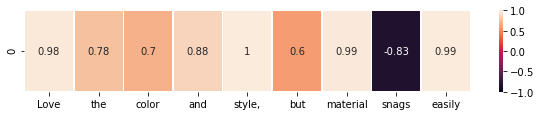

In [14]:
sample_review = data.loc[52,"Review Text"]

word_sentiment_score_flair = []
for word in sample_review.split():
    
    flair_score = get_flair_score(word)
    print("{} : {}".format(word, flair_score))
    
    word_sentiment_score_flair.append(flair_score)
    
plt.figure(figsize=(10,1.5))
sns.heatmap([word_sentiment_score_flair], vmin=-1,vmax=1, xticklabels=sample_review.split(), annot=True, linewidths=.5)
plt.show()

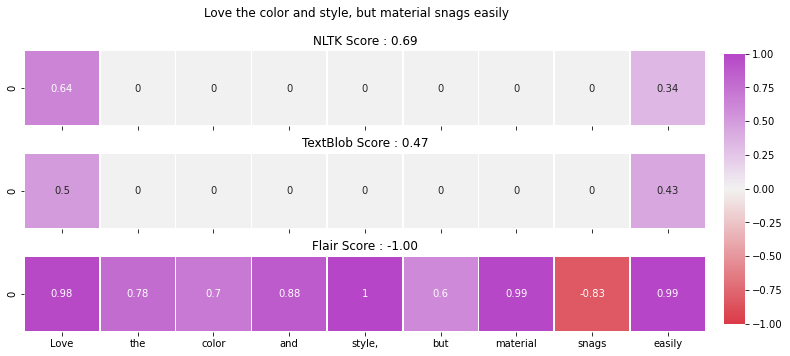

In [15]:
sample_review = data.loc[52,"Review Text"]

# NLTK
word_sentiment_score_nltk = [sid.polarity_scores(word)['compound'] for word in sample_review.split()]
overall_score_nltk = sid.polarity_scores(sample_review)['compound']

# TextBlob
word_sentiment_score_tblob = [TextBlob(word).sentiment.polarity for word in sample_review.split()]
overall_score_tblob = TextBlob(sample_review).sentiment.polarity

# Flair
word_sentiment_score_flair = [get_flair_score(word) for word in sample_review.split()]
overall_score_flair = get_flair_score(sample_review)

fig, ax = plt.subplots(3,1, figsize=(10,5), sharex=True)
cbar_ax = fig.add_axes([1.01,.1,.03,.75])

# Visualize
scores_overall = [overall_score_nltk, overall_score_tblob, overall_score_flair]
labels = ["NLTK", "TextBlob", "Flair"]
scores_words = [word_sentiment_score_nltk, word_sentiment_score_tblob, word_sentiment_score_flair]

for i, (lab, so, sw) in enumerate(np.array([labels, scores_overall, scores_words]).T):
       
    sns.heatmap([sw], vmin=-1,vmax=1, cbar_ax=cbar_ax, cmap=sns.diverging_palette(10, 300, as_cmap=True), xticklabels=sample_review.split(), annot=True, linewidths=.5, ax=ax[i])
    ax[i].set_title("%s Score : %.2f"%(lab, so))
    
fig.suptitle(sample_review)

fig.tight_layout()
plt.show()




In [16]:
def compare_sentiment_methods(sample_review):
    
    # NLTK
    word_sentiment_score_nltk = [sid.polarity_scores(word)['compound'] for word in sample_review.split()]
    overall_score_nltk = sid.polarity_scores(sample_review)['compound']

    # TextBlob
    word_sentiment_score_tblob = [TextBlob(word).sentiment.polarity for word in sample_review.split()]
    overall_score_tblob = TextBlob(sample_review).sentiment.polarity

    # Flair
    word_sentiment_score_flair = [get_flair_score(word) for word in sample_review.split()]
    overall_score_flair = get_flair_score(sample_review)
    
    
     # Visualize
    fig, ax = plt.subplots(3,1, figsize=(10,5), sharex=True)
    cbar_ax = fig.add_axes([1.01,.1,.03,.75])
    cmap = sns.diverging_palette(10, 300, as_cmap=True)
   
    scores_overall = [overall_score_nltk, overall_score_tblob, overall_score_flair]
    labels = ["NLTK", "TextBlob", "Flair"]
    scores_words = [word_sentiment_score_nltk, word_sentiment_score_tblob, word_sentiment_score_flair]

    for i, (lab, so, sw) in enumerate(np.array([labels, scores_overall, scores_words]).T):

        sns.heatmap([sw], vmin=-1,vmax=1, cbar_ax=cbar_ax, cmap=cmap,xticklabels=sample_review.split(), annot=True, linewidths=.5, ax=ax[i])
        ax[i].set_title("%s Score : %.2f"%(lab, so))

    fig.suptitle(sample_review)

    fig.tight_layout()
    plt.show()


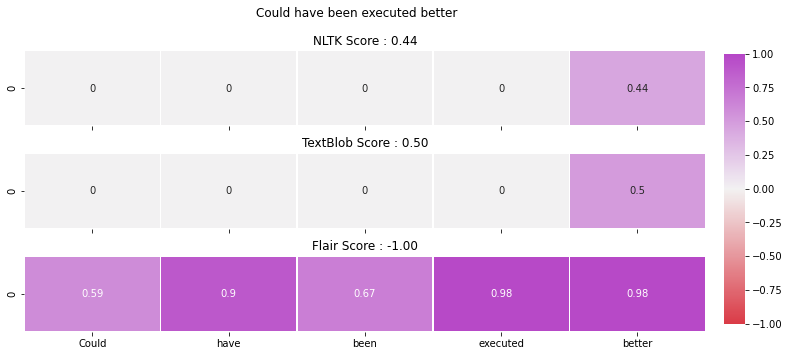

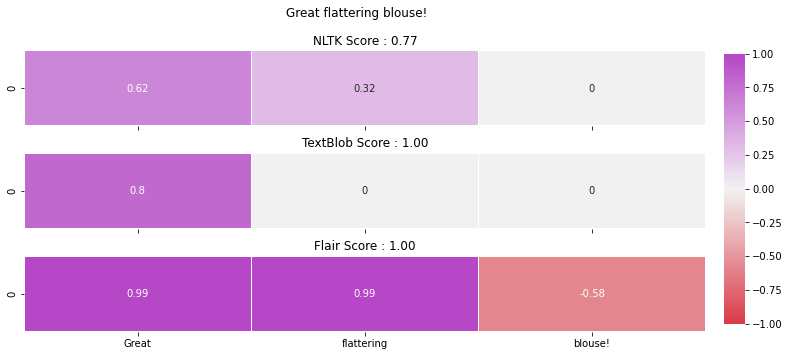

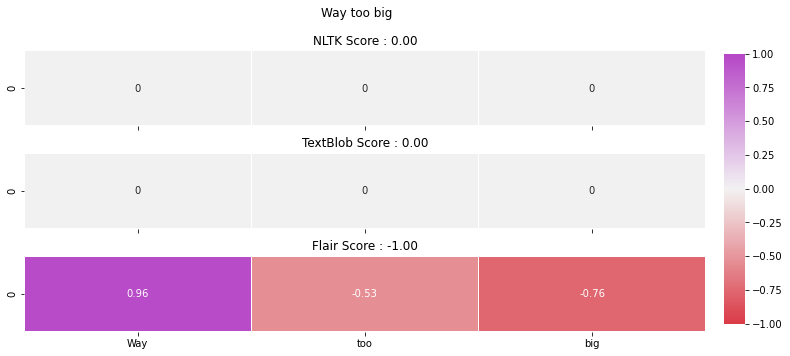

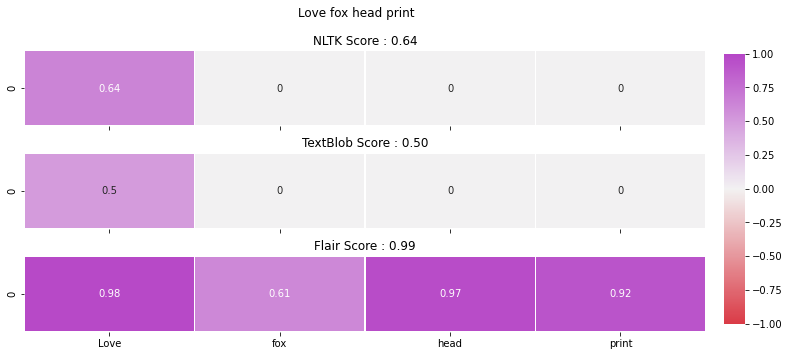

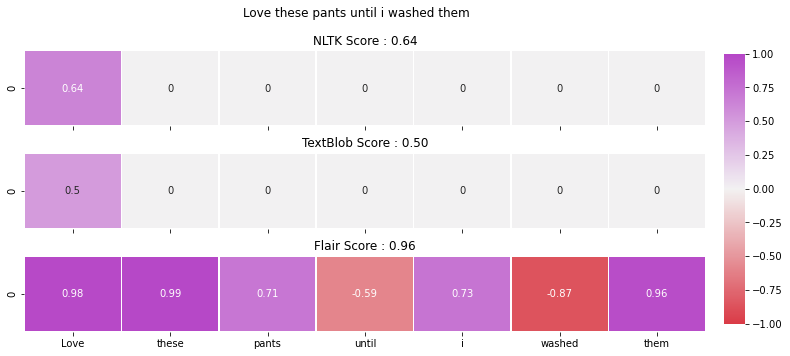

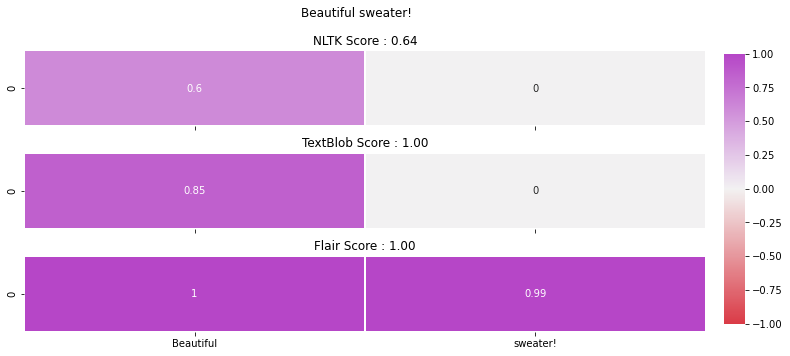

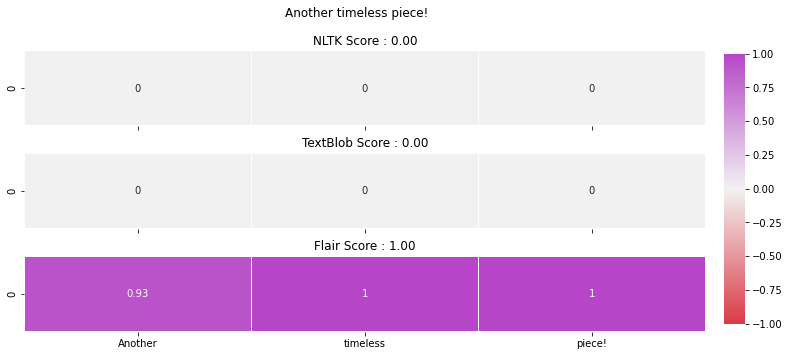

In [17]:
# Take n = 10 sample reviews
n = 10
sample_reviews = data.sample(n)['Title'].dropna()

for review in sample_reviews:
    compare_sentiment_methods(review)

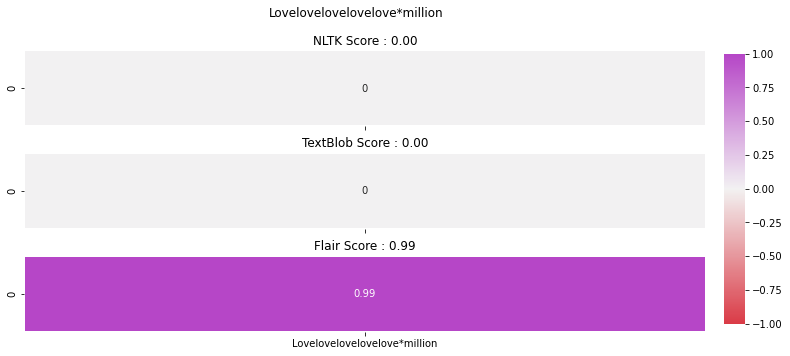

In [18]:
compare_sentiment_methods("Lovelovelovelovelove*million")